In [1]:
# A project of low dimensionality and the baseline
# Date: 16-03-2020

In [2]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
data = pd.read_csv(uri)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
# To use in pt-BR:

# to_rename_pt_BR = {
#     'unfinished'     :  'nao_finalizado',
#     'expected_hours' : 'horas_previstas',
#     'price'          :           'preco'
# }
# data.rename(columns = to_rename)
# Doing it, you'll need to rename all variable names

In [4]:
# To change the concept to a natural definition we will change the 'unfinished' column to 'finished'
exchange = {
    0 : 1,
    1 : 0
}

data['finished'] = data.unfinished.map(exchange)
data.tail() # The last lines of the table/file

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [5]:
import seaborn as sns # statistical data visualization - https://seaborn.pydata.org/

sns.scatterplot(x='expected_hours', y='price', data=data, color='g')

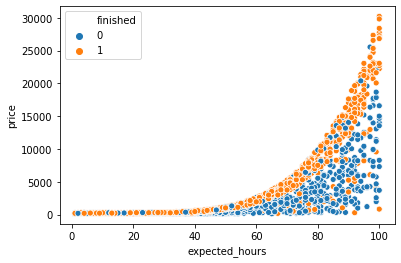

In [6]:
# To separate according to the 'finished' column
sns.scatterplot(x='expected_hours', y='price', data=data, hue='finished')

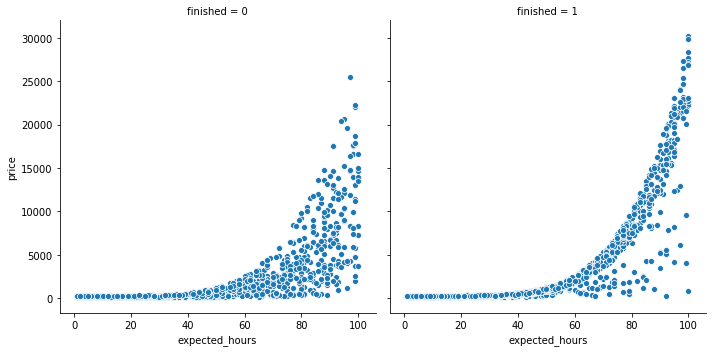

In [7]:
# To separate in 2 graphs according to the 'finished' column
sns.relplot(x='expected_hours', y='price', data=data, col='finished')

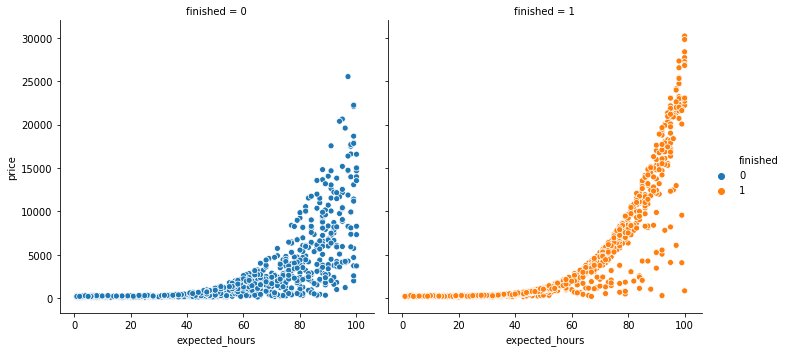

In [8]:
# To separate using 2 graphs and 2 colours:
sns.relplot(x='expected_hours', y='price', data=data, col='finished', hue='finished')
# Using it we can analyze better the datas and its properties

In [10]:
# 5th Class
# Date: 28-03-2020
# Support Vector Machine and the nonlinearity 
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

x = data[['expected_hours', 'price']]
y = data['finished']

# SEED = 8
# train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)
# print("We'll train with %d samples and test with %d samples" % (len(train_x), len(test_x)))
# # Passing SEED to the random state argument we can fix the value and the model used
# # model = LinearSVC()
# model = LinearSVC(random_state=SEED)

SEED = 8
# Defining the numpy seed we don't need to pass any argument
# to the model.
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)
print("We'll train with %d samples and test with %d samples" % (len(train_x), len(test_x)))
model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions)
print("The accuracy of the test was %.2f%%." % (accuracy*100))

# This problem show that this type of classification doesn't work to this problem. It occured because, as we can 
# see, the results may not be separeted by a linear algorithm.


We'll train with 1617 samples and test with 540 samples
The accuracy of the test was 56.67%.


/home/bruna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
# Now, to comparate the efficiency of the algorithm, we'll create other that 'think' that all the results are 1.
import numpy as np
base_line = np.ones(len(test_x)) # Number of samples used to test

accuracy = accuracy_score(test_y, base_line)
print("The accuracy of the baseline algorithm was %.2f%%." % (accuracy*100))
# The baseline algorithm is a default that we must overcome and use as a result that anyone can get. 

The accuracy of the baseline algorithm was 52.59%.


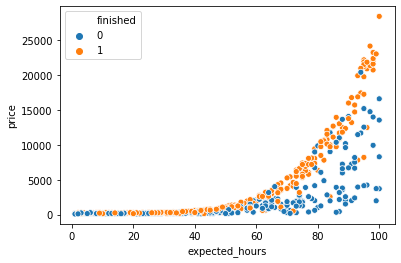

In [12]:
# Analysing the results
sns.scatterplot(x = 'expected_hours', y = 'price', data = test_x, hue = test_y)

In [13]:
# To see what our algorithm predict to this data:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()

y_min = test_x.price.min()
y_max = test_x.price.max()

pixels = 1000

x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)


In [14]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html
# To mesh x and y axis:
xx, yy = np.meshgrid(x_axis, y_axis)    # Return coordinate matrices from coordinate vectors. 
points = np.c_[xx.ravel(), yy.ravel()]  # Translates slice objects to concatenation along the second axis.

Z = model.predict(points)
Z = Z.reshape(xx.shape)

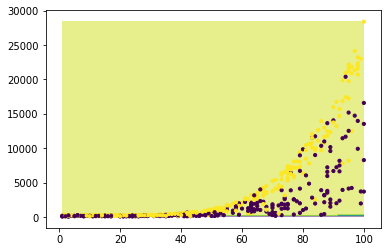

In [15]:
# This algoritm is only able to learn and separate data using straight line
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.5) # Generate a background separeted by Z values
plt.scatter(test_x.expected_hours, test_x.price, c = test_y, s = 10)

In [16]:
# Now we can use other types of SVM forneced by the same library
# (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)
# We need choose the best option to our problem.
# Trying now with the svm.SVC

In [21]:
# Support Vector Machine and the nonlinearity
# Trying with SVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

x = data[['expected_hours', 'price']]
y = data['finished']

SEED = 8
# Defining the numpy seed we don't need to pass any argument
# to the model.
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)
print("We'll train with %d samples and test with %d samples" % (len(train_x), len(test_x)))
model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions)
print("The accuracy of the test was %.2f%%." % (accuracy*100))

We'll train with 1617 samples and test with 540 samples
The accuracy of the test was 59.07%.


/home/bruna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


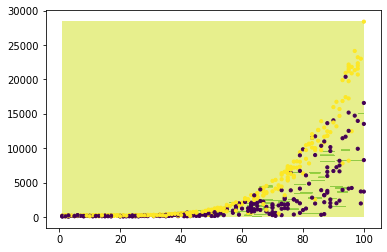

In [22]:
# To see what our algorithm predict to this data:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()

y_min = test_x.price.min()
y_max = test_x.price.max()

pixels = 1000

x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html
# To mesh x and y axis:
xx, yy = np.meshgrid(x_axis, y_axis)    # Return coordinate matrices from coordinate vectors. 
points = np.c_[xx.ravel(), yy.ravel()]  # Translates slice objects to concatenation along the second axis.

Z = model.predict(points)
Z = Z.reshape(xx.shape)

# This algoritm is only able to learn and separate data using straight line
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.5) # Generate a background separeted by Z values
plt.scatter(test_x.expected_hours, test_x.price, c = test_y, s = 10)


In [24]:
# Changing the scale to adapt the data to the classifier
from sklearn.preprocessing import  StandardScaler

# Support Vector Machine and the nonlinearity
# Trying with SVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

x = data[['expected_hours', 'price']]
y = data['finished']

SEED = 8
# Defining the numpy seed we don't need to pass any argument
# to the model.
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)
print("We'll train with %d samples and test with %d samples" % (len(train_x), len(test_x)))

# Creating a StandardScale:
scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions)
print("The accuracy of the test was %.2f%%." % (accuracy*100))

We'll train with 1617 samples and test with 540 samples
The accuracy of the test was 71.30%.


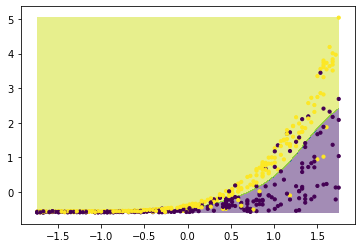

In [32]:
# Since the scaler converted our data to an array of arrays, 
# without names, we can't use .predicted_hours or .price, for example
# So, we can do that simple step:
data_x = test_x[:, 0]
data_y = test_x[:, 1]

# To see what our algorithm predict to this data:
x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

pixels = 1000

x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html
# To mesh x and y axis:
xx, yy = np.meshgrid(x_axis, y_axis)    # Return coordinate matrices from coordinate vectors. 
points = np.c_[xx.ravel(), yy.ravel()]  # Translates slice objects to concatenation along the second axis.

Z = model.predict(points)
Z = Z.reshape(xx.shape)

# This algoritm is only able to learn and separate data using straight line
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.5) # Generate a background separeted by Z values
plt.scatter(data_x, data_y, c = test_y, s = 10)

# Observing the result, we can see that even if the percent of accerts
# is very similar, this machine is learning and presents a result much better than the previous one.

In [28]:
raw_train_x

,expected_hours,price
1984,19,281
1043,34,327
1648,48,756
1581,32,340
1101,23,243
...,...,...
1386,5,288
286,48,577
1065,20,248
800,81,3526
